In [20]:
library(tidyverse)
library(caret)
library(lattice)
library(dygraphs)
library(cowplot)
library(ggthemr)

ggthemr::ggthemr("fresh")
options(repr.plot.width=12, repr.plot.height=5)

Warning message:
“New theme missing the following elements: panel.grid, plot.tag, plot.tag.position”

_Note: All EDA done on training split only_

## What value do the zones add?

### For regression

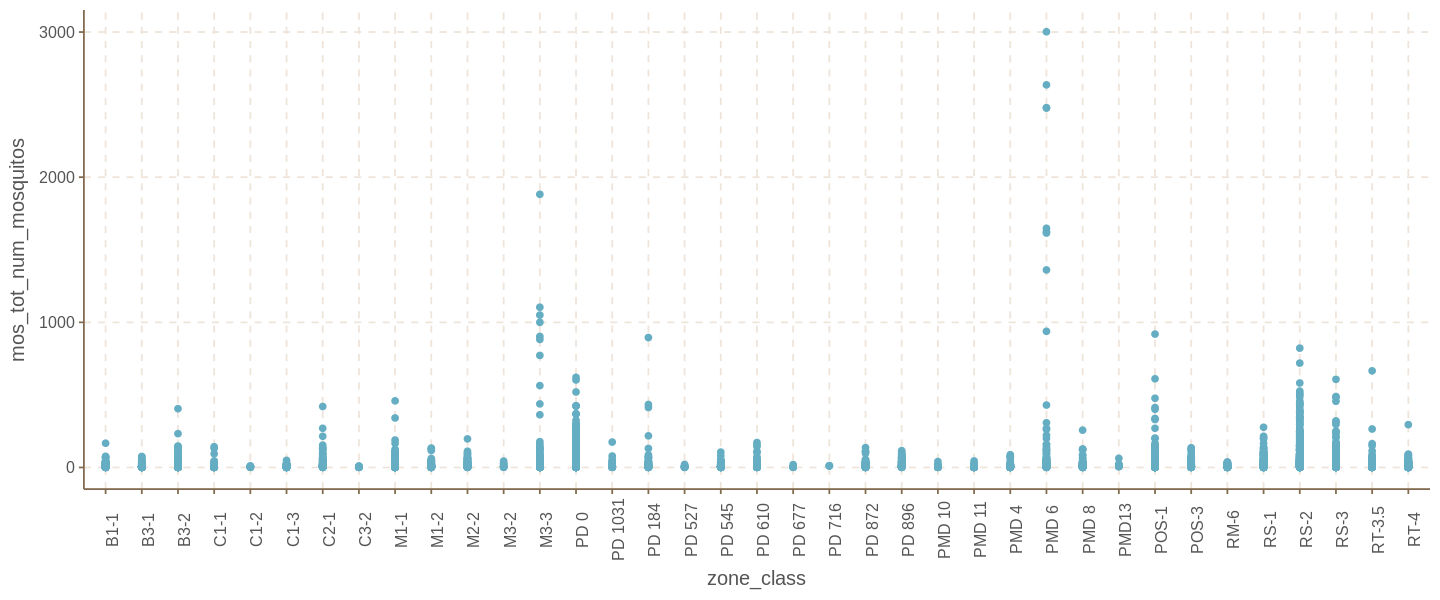

In [26]:
df_train %>% ggplot(aes(y=mos_tot_num_mosquitos,x=zone_class)) + geom_point() + 
    theme(axis.text.x = element_text(angle=90))

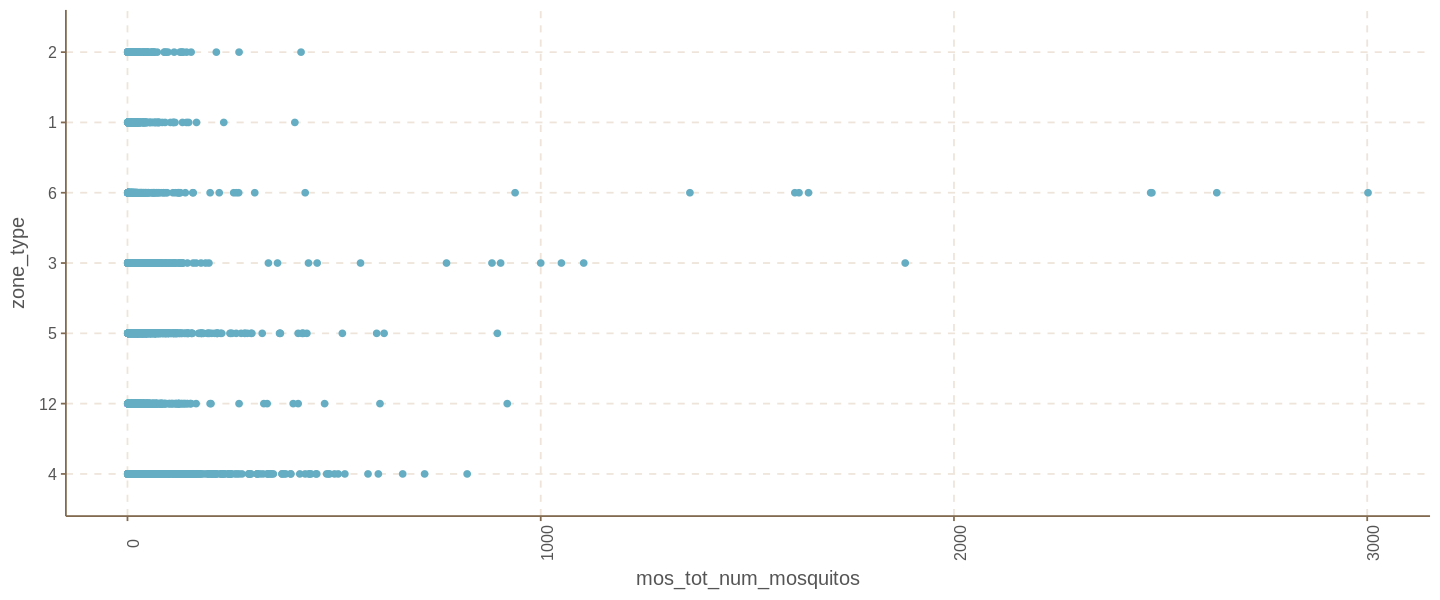

In [31]:
df_train %>% ggplot(aes(y=mos_tot_num_mosquitos,x=zone_type)) + geom_point() + 
    theme(axis.text.x = element_text(angle=90))+coord_flip()

## For classification

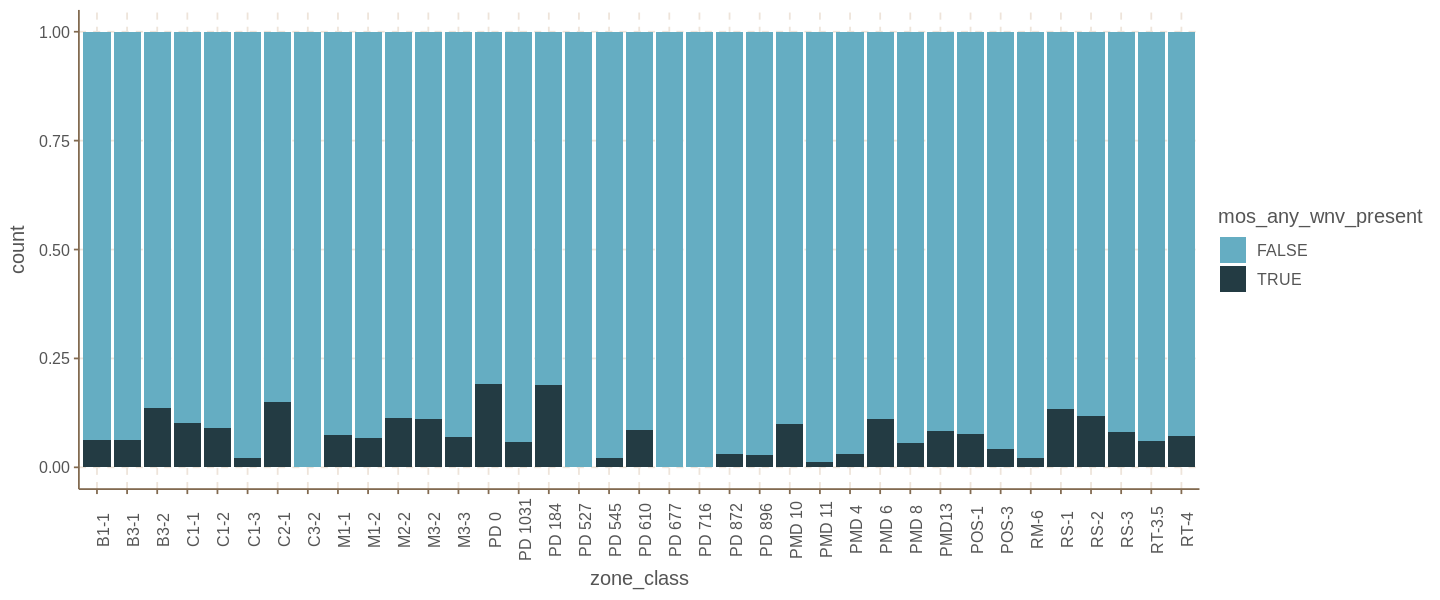

In [28]:
df_train %>% ggplot(aes(fill=mos_any_wnv_present,zone_class)) +
    geom_bar(position="fill")+theme(axis.text.x = element_text(angle=90))

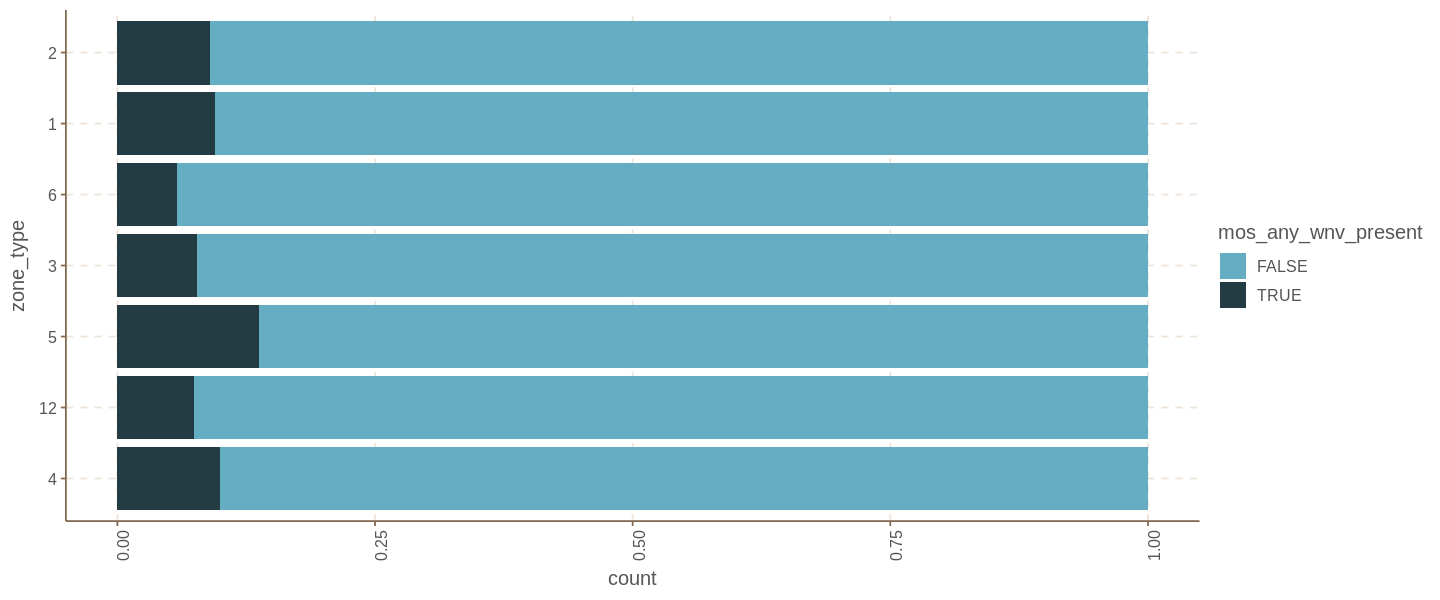

In [30]:
df_train %>% ggplot(aes(fill=mos_any_wnv_present,zone_type)) +
    geom_bar(position="fill")+theme(axis.text.x = element_text(angle=90))+coord_flip()

### Where are the different zones located?

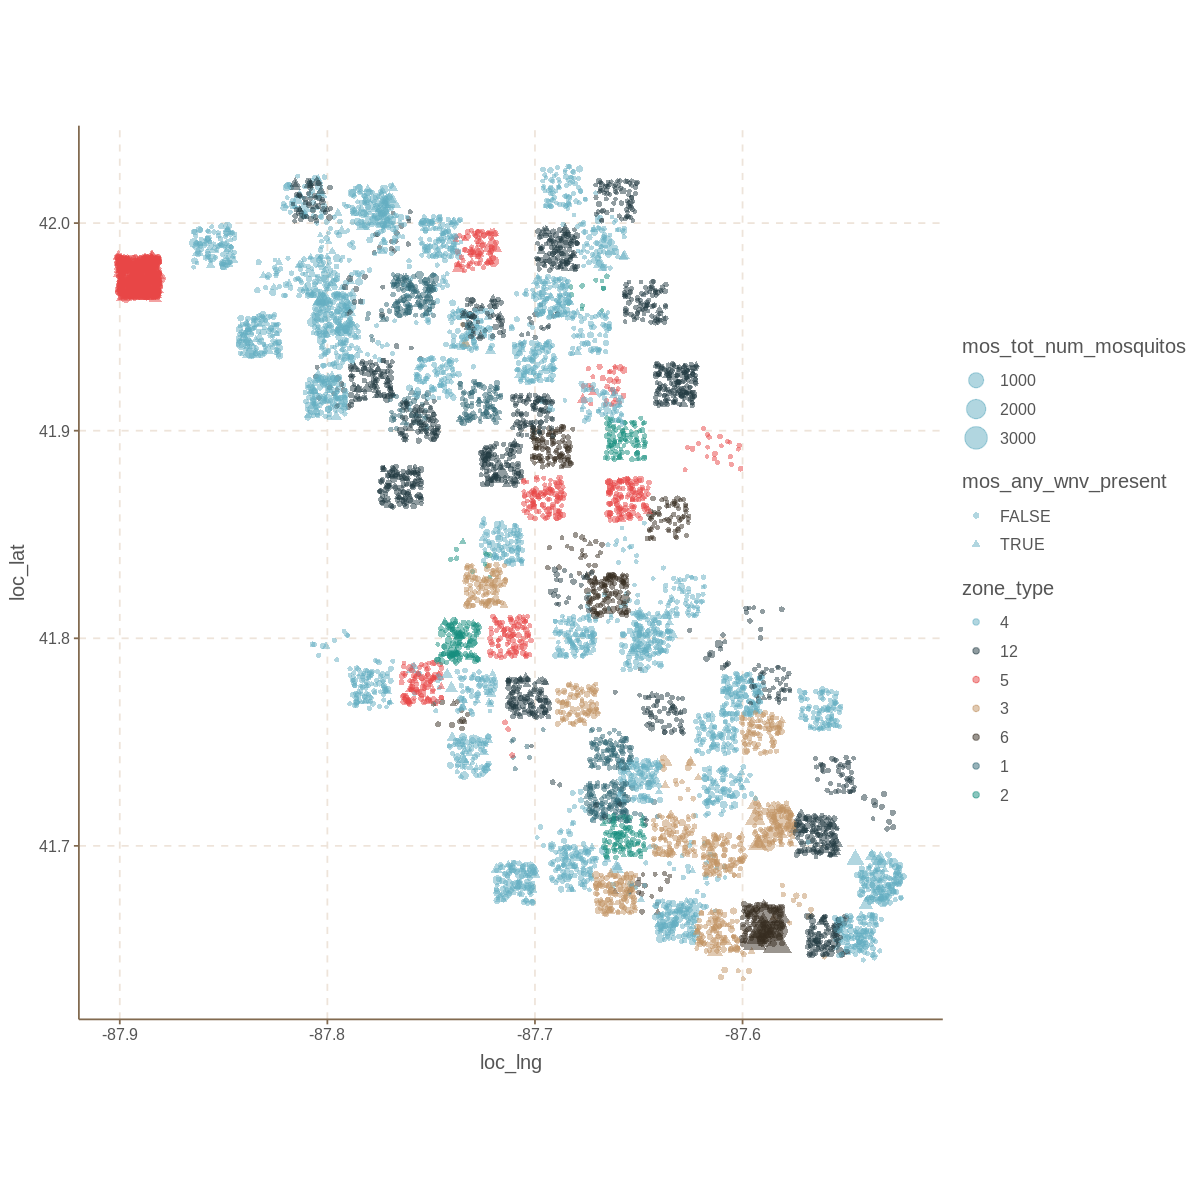

In [57]:
options(repr.plot.width=10, repr.plot.height=10)
df_train %>%
    ggplot(aes(loc_lng,loc_lat,color=zone_type,shape=mos_any_wnv_present,size=mos_tot_num_mosquitos))+
    geom_jitter(width = 0.01, height = 0.01, alpha = 0.5)+
    coord_equal()
options(repr.plot.width=12, repr.plot.height=5)

What's going on with that dark red square?

And note the large sized black triangles at the bottom right too. Interesting.

# Do the trap variables offer anything?

In [54]:
df_train %>% select(starts_with("trap")) %>% head()

trap_trap_name,trap_satellite_ind,trap_trap_type
T002,FALSE,GRAVID
T007,FALSE,CDC
T015,FALSE,GRAVID
T045,FALSE,GRAVID
T046,FALSE,CDC
T048,FALSE,GRAVID


## For regression?

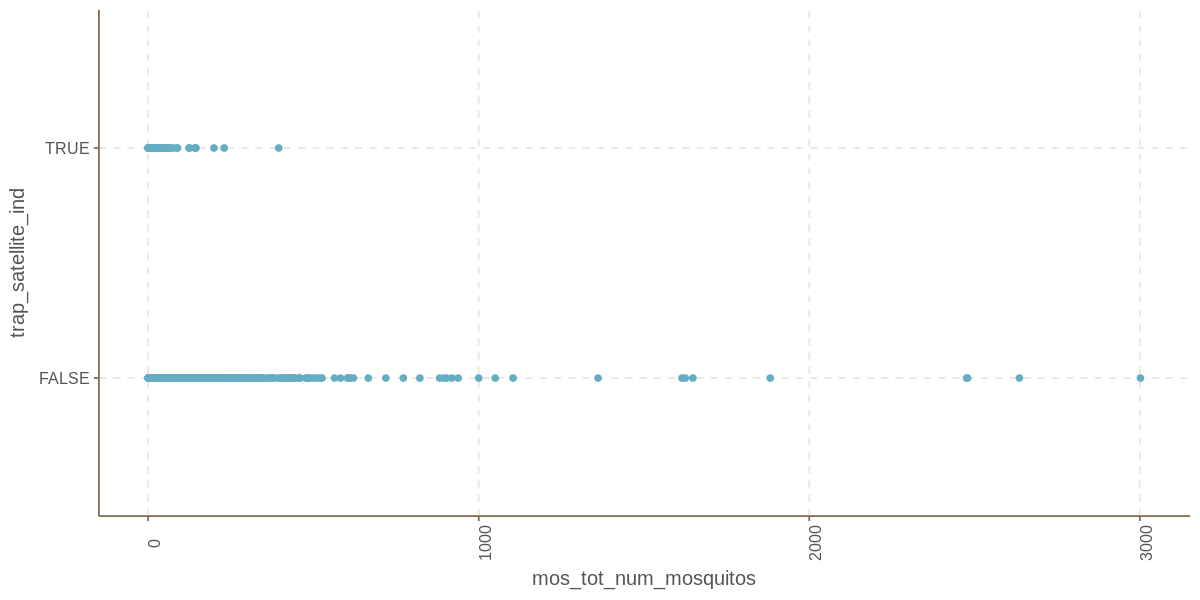

In [105]:
options(repr.plot.width=10, repr.plot.height=5)
df_train %>% ggplot(aes(y=mos_tot_num_mosquitos,x=trap_satellite_ind)) + geom_point() + 
    theme(axis.text.x = element_text(angle=90)) + coord_flip()

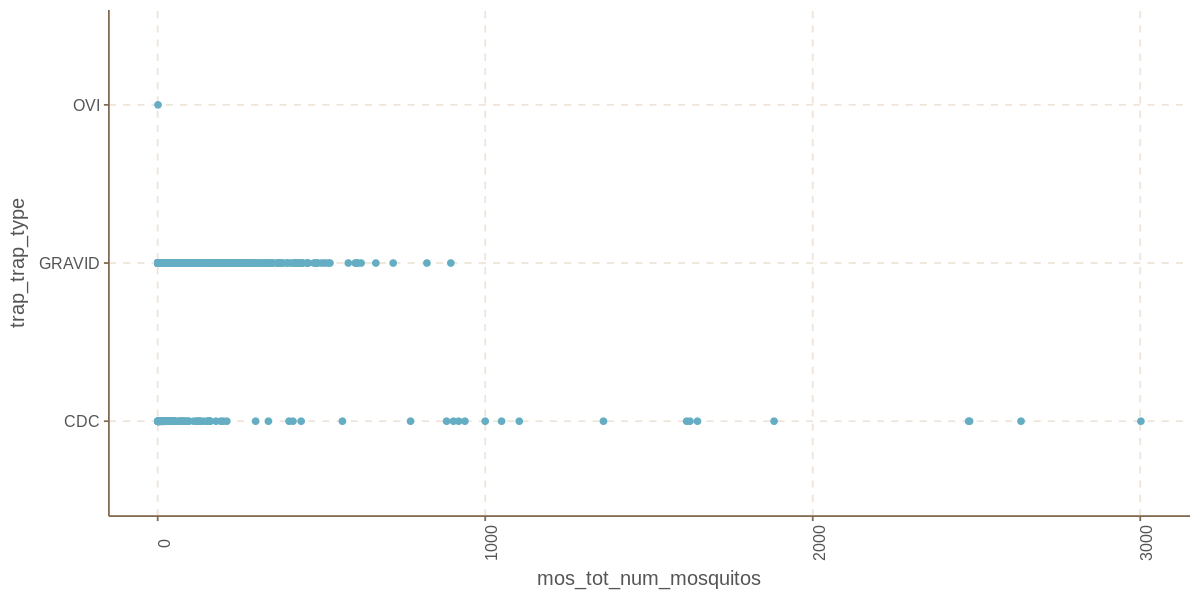

In [106]:
df_train %>% ggplot(aes(y=mos_tot_num_mosquitos,x=trap_trap_type)) + geom_point() + 
    theme(axis.text.x = element_text(angle=90)) + coord_flip()

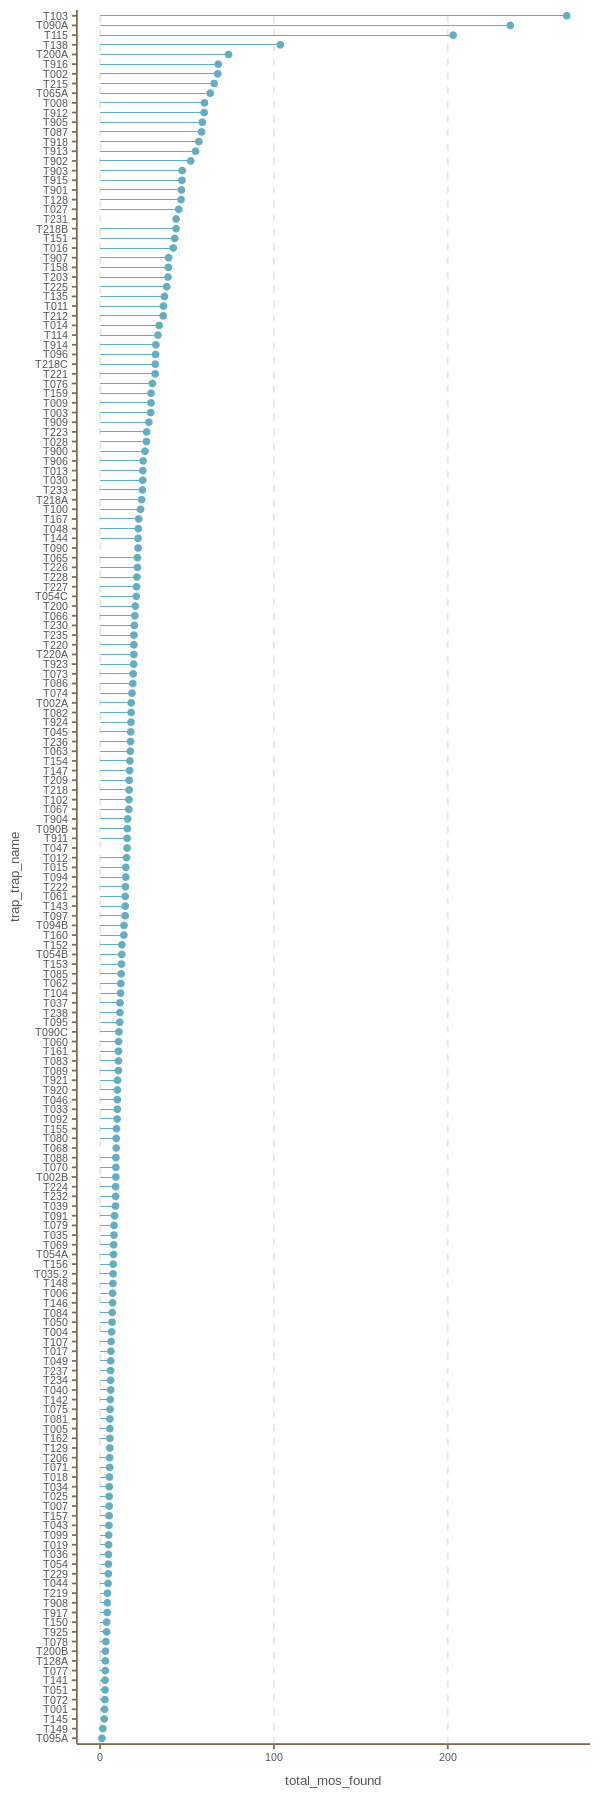

In [108]:
options(repr.plot.width=5, repr.plot.height=15)
df_train %>% 
    select(mos_tot_num_mosquitos, trap_trap_name) %>%
    group_by(trap_trap_name) %>%
    summarize(total_mos_found = sum(mos_tot_num_mosquitos)/length(trap_trap_name)) %>%
    mutate(trap_trap_name = factor(trap_trap_name,levels = trap_trap_name[order(.$total_mos_found)])) %>%
    ggplot(aes(y=total_mos_found,x=trap_trap_name)) +
    geom_point()+geom_col(width = .1)+theme(text = element_text(size=8))+
    coord_flip() + theme(panel.grid.major.y = element_blank())

## For classification?

Why is that one trap "T090A" 100% infected?

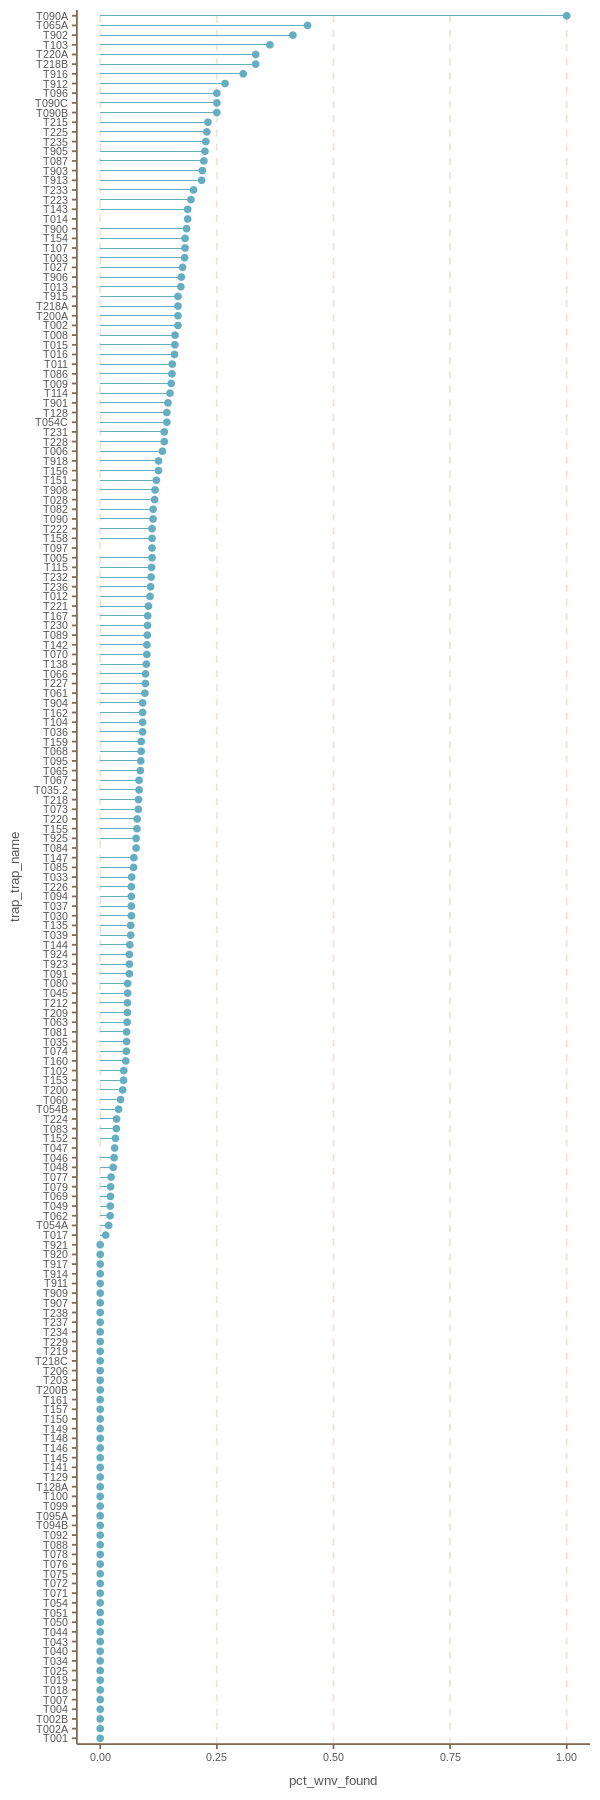

In [92]:
options(repr.plot.width=5, repr.plot.height=15)
df_train %>% 
    select(mos_any_wnv_present, trap_trap_name) %>%
    group_by(trap_trap_name) %>%
    summarize(pct_wnv_found = sum(mos_any_wnv_present)/length(trap_trap_name)) %>%
    mutate(trap_trap_name = factor(trap_trap_name,levels = trap_trap_name[order(.$pct_wnv_found)])) %>%
    ggplot(aes(y=pct_wnv_found,x=trap_trap_name)) +
    geom_point()+geom_col(width = .1)+theme(text = element_text(size=8))+
    coord_flip() + theme(panel.grid.major.y = element_blank())

The satellite variable adds no information

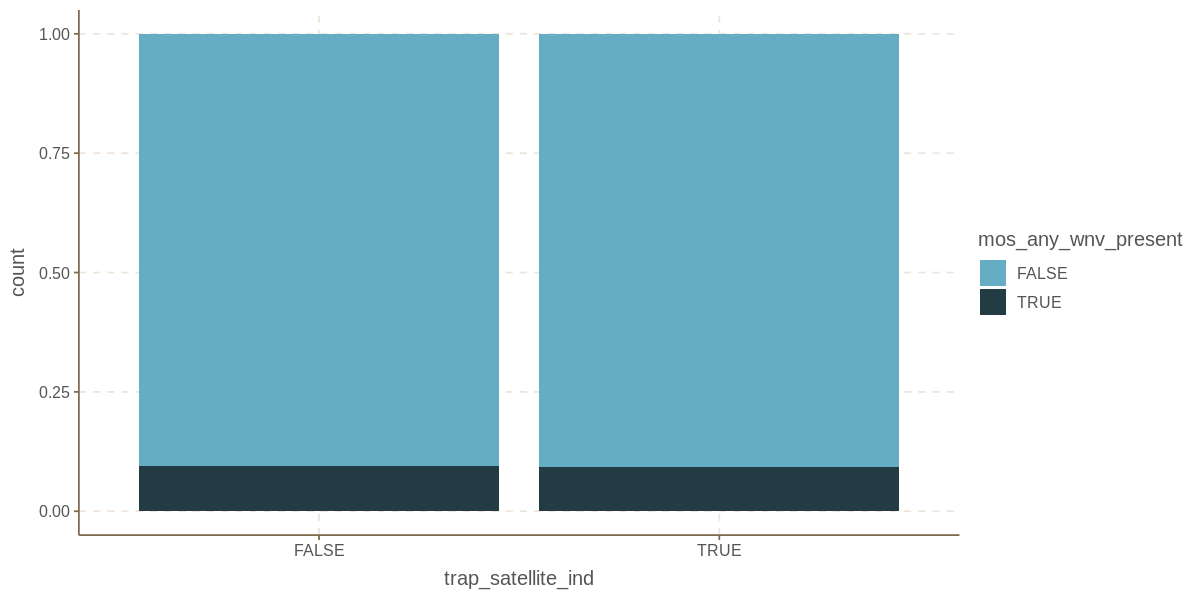

In [104]:
options(repr.plot.width=10, repr.plot.height=5)
df_train %>%
    ggplot(aes(fill=mos_any_wnv_present,trap_satellite_ind))+
    geom_bar(position = "fill")

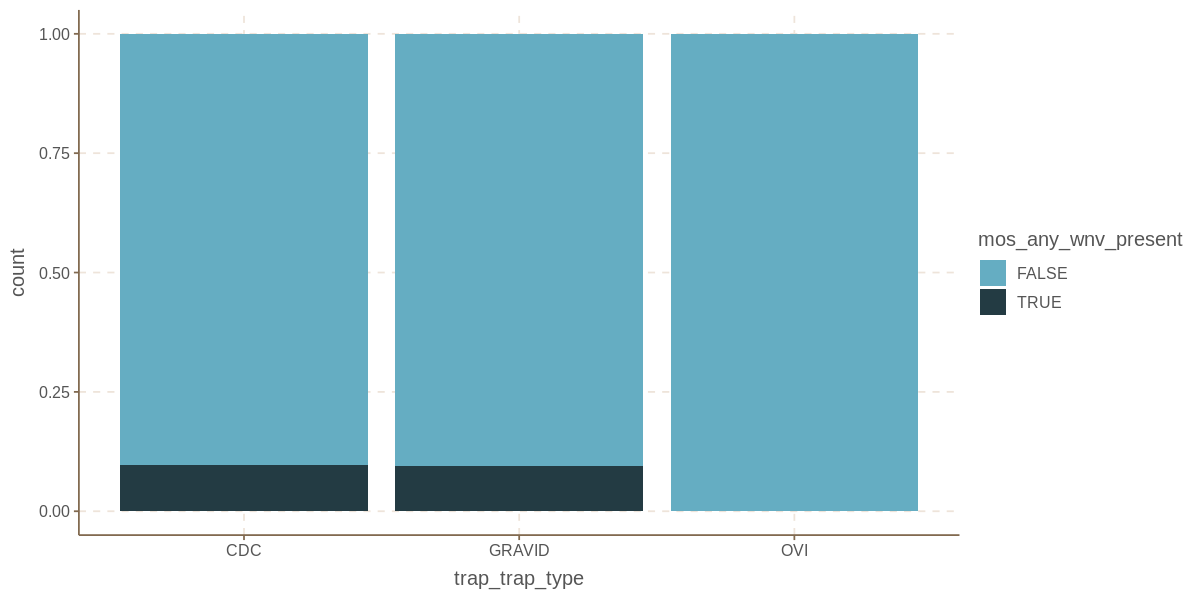

In [97]:
df_train %>%
    ggplot(aes(fill=mos_any_wnv_present,trap_trap_type))+
    geom_bar(position = "fill")